<a href="https://colab.research.google.com/github/YazMRRS/FisicaComputacional1/blob/master/Actividad_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Importamos las bibliotecas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm

%matplotlib inline

In [13]:
#En esta celsa se hacen todas las operaciones de preparar el DataFrame 

url = 'https://raw.githubusercontent.com/YazMRRS/FisicaComputacional1/master/Actividad1/26086Diario.txt'
my_cols = ['FECHA', 'PRECIP', 'EVAP', 'TMAX', 'TMIN']
df_dist = pd.read_csv(url, names=my_cols, encoding='cp1251', sep='\s+', header=None, skiprows=19, skipfooter=1, engine='python')

#Hacemos una copia de trabajo 
df_work0 = df_dist.copy()

#Reemplazamos los textos 'Nulo' por espacio en blanco ''
str_Nulo = 'Nulo'
df_work1 = df_work0.replace(to_replace=str_Nulo, value='', regex=True)

#Convertimos los valores de las variables ambientales a números flotantes
cols_list = ['PRECIP','EVAP', 'TMAX', 'TMIN']
for cols in cols_list:
  df_work1[cols] = pd.to_numeric(df_work1[cols], errors ='coerce')

#Definimos un nuevo dataframe
df_work2 = df_work1.copy()

#Agregamos la opción de que el primer dato es el día 
df_work2['FECHA']=pd.to_datetime(df_work2['FECHA'], dayfirst=True).copy()

#Añadimos dos columnas adicionales
df_work2['AÑO']=df_work2['FECHA'].dt.year
df_work2['MES']=df_work2['FECHA'].dt.strftime('%b')

#Definimos un nuevo dataframe para el análisis de los datos meteorológicos
df_datos = df_work2.copy()
df_datos.info()
print(df_datos.head())
print(df_datos.tail())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19169 entries, 0 to 19168
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   FECHA   19169 non-null  datetime64[ns]
 1   PRECIP  19155 non-null  float64       
 2   EVAP    4123 non-null   float64       
 3   TMAX    19062 non-null  float64       
 4   TMIN    19067 non-null  float64       
 5   AÑO     19169 non-null  int64         
 6   MES     19169 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB
       FECHA  PRECIP  EVAP  TMAX  TMIN   AÑO  MES
0 1924-08-05     0.0   NaN  42.0  29.0  1924  Aug
1 1924-08-06     0.0   NaN  42.3  24.8  1924  Aug
2 1924-08-07     0.0   NaN  42.0  25.5  1924  Aug
3 1924-08-08     0.0   NaN  38.3  26.5  1924  Aug
4 1924-08-09     0.0   NaN  42.5  26.4  1924  Aug
           FECHA  PRECIP  EVAP  TMAX  TMIN   AÑO  MES
19164 1987-12-27     0.0   NaN  14.0  -2.5  1987  Dec
19165 1

In [14]:
#Hacemos una copia del último dataframe para realizar nuevas operaciones
df_datos_ts=df_datos.copy()

#Redefinimos el índice del dataframe a que sea la variable 'Fecha'
df_datos_ts=df_datos_ts.set_index('FECHA')

#Verificamos
df_datos_ts.info()
print(df_datos_ts.head())
print(df_datos_ts.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19169 entries, 1924-08-05 to 1987-12-31
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRECIP  19155 non-null  float64
 1   EVAP    4123 non-null   float64
 2   TMAX    19062 non-null  float64
 3   TMIN    19067 non-null  float64
 4   AÑO     19169 non-null  int64  
 5   MES     19169 non-null  object 
dtypes: float64(4), int64(1), object(1)
memory usage: 1.0+ MB
            PRECIP  EVAP  TMAX  TMIN   AÑO  MES
FECHA                                          
1924-08-05     0.0   NaN  42.0  29.0  1924  Aug
1924-08-06     0.0   NaN  42.3  24.8  1924  Aug
1924-08-07     0.0   NaN  42.0  25.5  1924  Aug
1924-08-08     0.0   NaN  38.3  26.5  1924  Aug
1924-08-09     0.0   NaN  42.5  26.4  1924  Aug
            PRECIP  EVAP  TMAX  TMIN   AÑO  MES
FECHA                                          
1987-12-27     0.0   NaN  14.0  -2.5  1987  Dec
1987-12-28     0.0   NaN  16.0   1.0 

In [15]:
#Seleccionamos un conjunto de años de 30 años
df_3=df_datos_ts[(df_datos_ts['AÑO']>=1924)&(df_datos_ts['AÑO']<1927)]
df_33=df_datos_ts[(df_datos_ts['AÑO']>=1927)&(df_datos_ts['AÑO']<1957)]
df_63=df_datos_ts[(df_datos_ts['AÑO']>=1957)&(df_datos_ts['AÑO']<1987)]

In [16]:
df_63.head()

,PRECIP,EVAP,TMAX,TMIN,AÑO,MES
FECHA,,,,,,
1957-01-01,0.0,2.3,22.0,4.0,1957,Jan
1957-01-02,33.0,2.3,18.5,5.0,1957,Jan
1957-01-03,0.0,1.3,17.5,7.0,1957,Jan
1957-01-04,0.0,1.1,18.0,8.5,1957,Jan
1957-01-05,0.0,1.0,20.0,8.0,1957,Jan


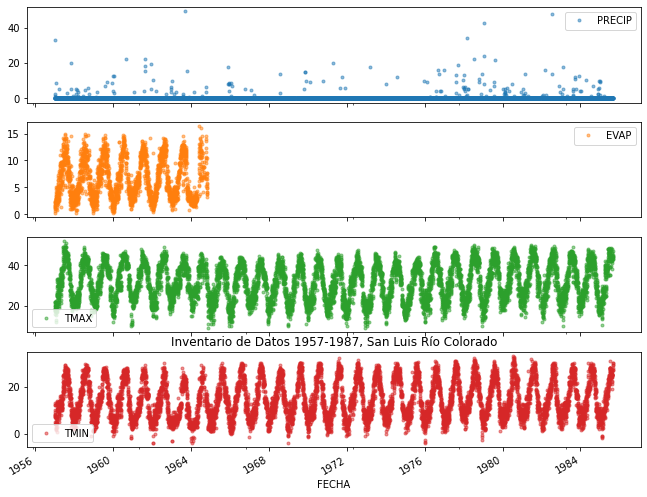

In [17]:
cols_plot=['PRECIP', 'EVAP', 'TMAX', 'TMIN']
ax_ylabels=['PRECIP (mm)', 'EVAP (mm)', 'TMAX (°C)', 'TMIN (°C)']
axes=df_63[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
plt.title('Inventario de Datos 1957-1987, San Luis Río Colorado');

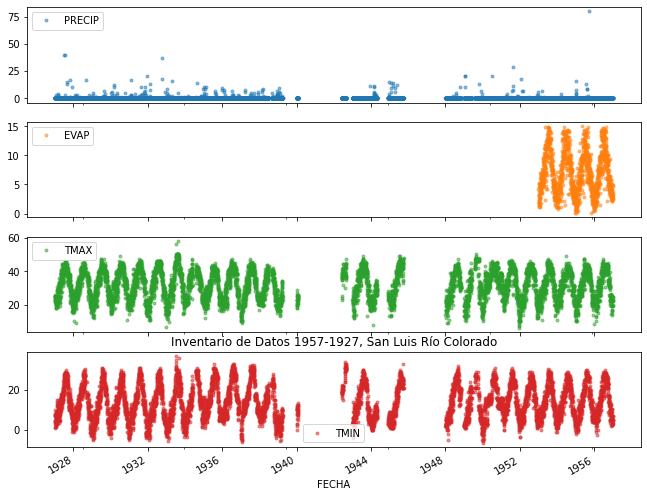

In [18]:
cols_plot=['PRECIP', 'EVAP', 'TMAX', 'TMIN']
ax_ylabels=['PRECIP (mm)', 'EVAP (mm)', 'TMAX (°C)', 'TMIN (°C)']
axes=df_33[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
plt.title('Inventario de Datos 1957-1927, San Luis Río Colorado');

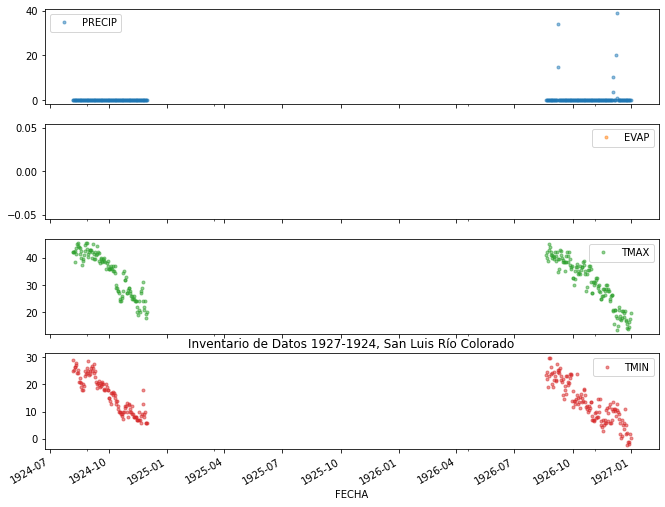

In [19]:
cols_plot=['PRECIP', 'EVAP', 'TMAX', 'TMIN']
ax_ylabels=['PRECIP (mm)', 'EVAP (mm)', 'TMAX (°C)', 'TMIN (°C)']
axes=df_3[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11,9), subplots=True)
plt.title('Inventario de Datos 1927-1924, San Luis Río Colorado');

Variación en Precipitación promedio 33-3: -0.32949673970410476
Variación en Precipitación promedio 63-33: -0.024180839372835355


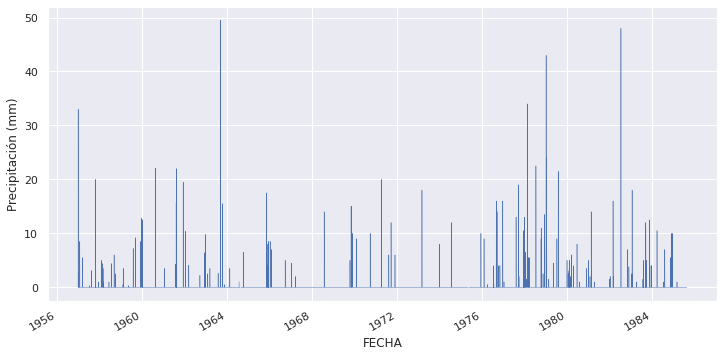

In [20]:
#Gráficamos la precipitación de los últimos 30 años 

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12,6)})

#Calculamos algunos promedios de cada época
PRECIP_AVE_63=df_63.PRECIP.mean()
PRECIP_AVE_33=df_33.PRECIP.mean()
PRECIP_AVE_3=df_3.PRECIP.mean()

#Gráficamos la precipitación de los últimos 30 años registrados 
df_63['PRECIP'].plot(linewidth=0.5);
plt.ylabel('Precipitación (mm)');

#Calculamos diferencias de los promedios de precipitación
print('Variación en Precipitación promedio 33-3:', PRECIP_AVE_33-PRECIP_AVE_3)
print('Variación en Precipitación promedio 63-33:', PRECIP_AVE_63-PRECIP_AVE_33)

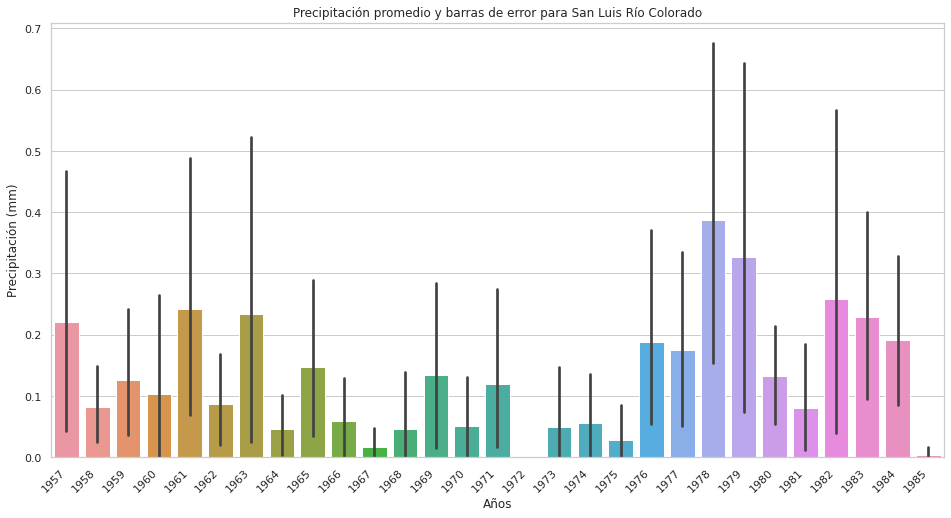

In [21]:
#Gráfica de precipitación de los últimos 30 años
#Agrupada por años
sns.set_style('whitegrid')

#Tamaño de la gráfica
plt.figure(figsize=(16,8))

#Gráficamos 30 años de datos usando la columna 'AÑO' en el eje x
g=sns.barplot(x='AÑO', y='PRECIP', data=df_63);

#Rotamos 45° los años en el eje x para mejor lectura
g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right');

plt.xlabel('Años')
plt.ylabel('Precipitación (mm)')
plt.title('Precipitación promedio y barras de error para San Luis Río Colorado')

plt.show()

Variación °C TMAX promedio 87s-57s: 0.044282805343563325


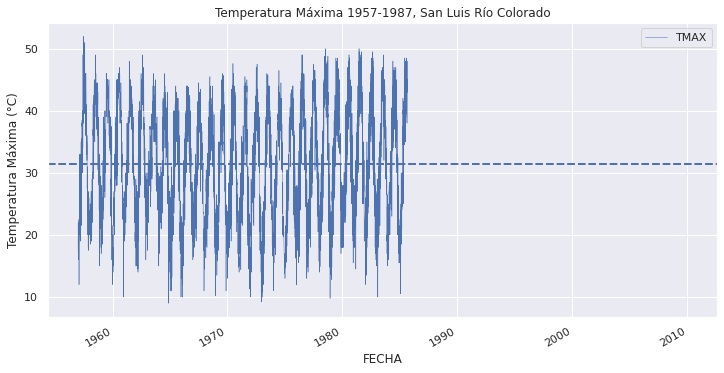

In [25]:
#Gráfica de las temperaturas máximas de los últimos 30 años

#Tamaño de la figura
sns.set(rc={'figure.figsize':(12,6)})

#Cálculo de promedios
TMAX_AVE_63=df_63.TMAX.mean()
TMAX_AVE_33=df_33.TMAX.mean()

#Gráficar líneas promedios
plt.axhline(TMAX_AVE_63, color='r', linestyle='--', linewidth=2);
plt.axhline(TMAX_AVE_33, color='b', linestyle='--', linewidth=2);

#Gráficar la temperatura
df_63['TMAX'].plot(linewidth=0.5);
plt.ylabel('Temperatura Máxima (°C)');
plt.title('Temperatura Máxima 1957-1985, San Luis Río Colorado')

plt.legend();

#Imprime la diferencia de temperaturas promedio entre épocas
print('Variación °C TMAX promedio 85s-57s:', TMAX_AVE_63-TMAX_AVE_33)

Variación °C TMIN promedio 87s-57s: 17.51414534855916


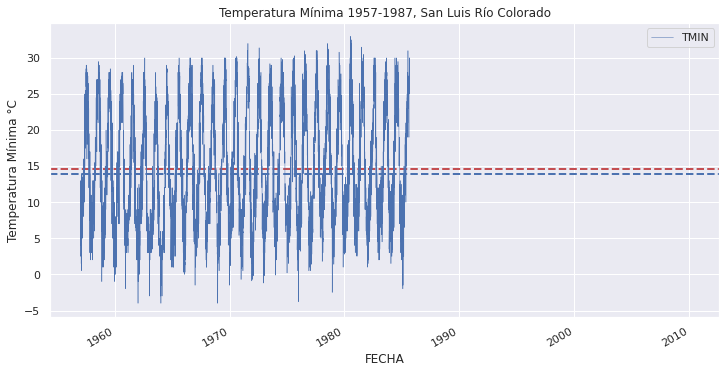

In [26]:
#Hacemos lo mismo para la temperatura mínima

sns.set(rc={'figure.figsize':(12,6)})

TMIN_AVE_63=df_63.TMIN.mean()
TMIN_AVE_33=df_33.TMIN.mean()

plt.axhline(TMIN_AVE_63, color='r', linestyle='--', linewidth=2);
plt.axhline(TMIN_AVE_33, color='b', linestyle='--', linewidth=2);

df_63['TMIN'].plot(linewidth=0.5);
plt.ylabel('Temperatura Mínima °C')
plt.title('Temperatura Mínima 1957-1985, San Luis Río Colorado')

plt.legend();

print('Variación °C TMIN promedio 85s-57s:', TMAX_AVE_63-TMIN_AVE_33)

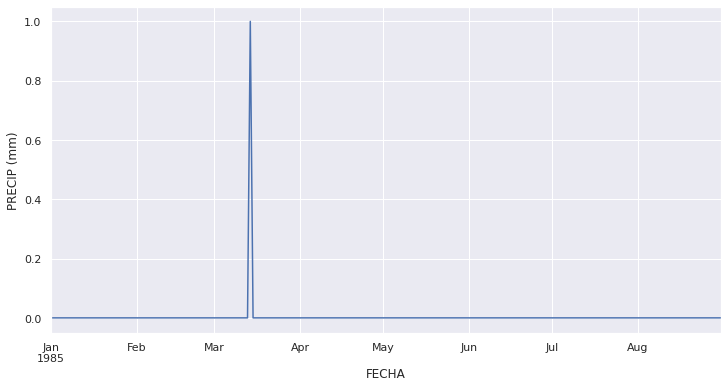

In [38]:
#Filtamos el periodo
ax = df_63.loc['1985','PRECIP'].plot()
ax.set_ylabel('PRECIP (mm)');

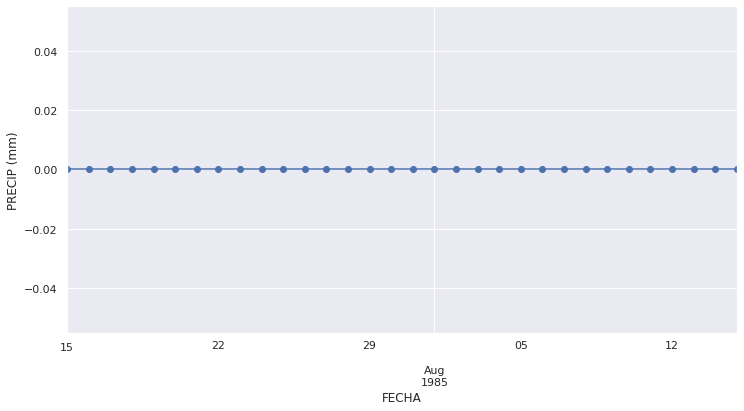

In [46]:
#Investigamos un periodo de datos
ax=df_63.loc['1985-07-15':'1985-08-15', 'PRECIP'].plot(marker='o', linestyle='-')
ax.set_ylabel('PRECIP (mm)');

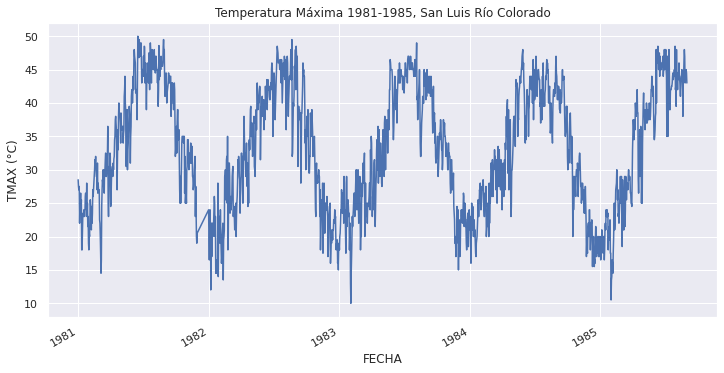

In [48]:
#Investigando un rango de datos
sns.set(rc={'figure.figsize':(12,6)})

ax=df_63.loc['1981':'1985', 'TMAX'].plot()
ax.set_ylabel('TMAX (°C)');
ax.set_title('Temperatura Máxima 1981-1985, San Luis Río Colorado');

In [7]:
#Suavizando la curva de TMAX, utilizando promedios móviles
data_cols=['EVAP', 'TMAX', 'TMIN']
df_63_7d=df_63[data_cols].rolling(7,center=true).mean()
df_63_30d=df_63[data_cols].rolling(30,center=True).mean()
df_63_365d=df_63[data_cols].rolling(365,center=True).mean() 

NameError: ignored

In [ ]:
#Fechas de inicio y fin 
start, end = '1984-01', '1985-12'

#Contraste de la gráfica de datos diarios y la de promedio móvil de 7 días
sns.set(rc={'figure.figsize':(12,6)})
fig,ax=plt.subplots()
ax.plot(df_63.loc[start:end, 'TMAX'], marker='.', linestyle='-', linewidth=0.5, label='DIARIOS')
ax.plot(df_63_7d.loc[start:end, 'TMAX'], marker='.', linestyle='-', label='Promedio móvil 7 días')

ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura máxima °C')
ax.set_title('Tempertatura máxima ')